# Question: How do the other regions comapre with Metro Manila in terms of sources of income?

Context: Metro Manila is the central hub for business in the Philippines. Historically speaking, pre-Spanish colonialism saw Metro Manila as the economic center for the country. Because of its convenient location and having ports, it was easier to do business there. Throughout history, this recurring theme of "a better life in Metro Manila" was reinforced because of the economic opportunities to be found there. 

I however have decided to move out of there because I prefer to live elsewhere. Reasons include its currently crumbling infrastructure, insane population density (relative to other regions), faulty public transportation, the insane traffic, and many others.

The question really stems from me pondering the idea of how are other regions fairing, and if it were possible, where could one settle and still be economically well off? To answer this question, I set out to study the Family, Income, and Expenditures Survey (FIES) conducted by the Philippine Statistics Authority in order to see for myself.

## Libraries
The only libraries we will be needing here are:

1) Pandas for handling our data into dataframes (better than excel once you get the hang of it, trust me)
<br/>2) Numpy for matrix manipulations and scientific operations
<br/>3) Seaborn for data visualization (a wrapper on top of Matplotlib's PyPlot)

## Data Preparation

The data for this can be found <a href="https://www.kaggle.com/grosvenpaul/family-income-and-expenditure">here on Kaggle</a>, prepared by Mr. Francis Paul Flores. He gathered up the FIES data into one single file and uploaded it on Kaggle. Originally Mr. Flores wanted this dataset to be used to predict household income, but for now, I will mainly use it for data exploration to answer my question from above.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_style("whitegrid", {"axes.grid": True})
color_palette = sns.color_palette("Set2", 10)

In [3]:
df = pd.read_csv('Family Income and Expenditure.csv')

In [4]:
column_names = list(df.columns.values)

In [5]:
for name in column_names:
    print name

Total Household Income
Region
Total Food Expenditure
Main Source of Income
Agricultural Household indicator
Bread and Cereals Expenditure
Total Rice Expenditure
Meat Expenditure
Total Fish and  marine products Expenditure
Fruit Expenditure
Vegetables Expenditure
Restaurant and hotels Expenditure
Alcoholic Beverages Expenditure
Tobacco Expenditure
Clothing, Footwear and Other Wear Expenditure
Housing and water Expenditure
Imputed House Rental Value
Medical Care Expenditure
Transportation Expenditure
Communication Expenditure
Education Expenditure
Miscellaneous Goods and Services Expenditure
Special Occasions Expenditure
Crop Farming and Gardening expenses
Total Income from Entrepreneurial Acitivites
Household Head Sex
Household Head Age
Household Head Marital Status
Household Head Highest Grade Completed
Household Head Job or Business Indicator
Household Head Occupation
Household Head Class of Worker
Type of Household
Total Number of Family members
Members with age less than 5 year old


In [6]:
print "==============="
print "NON-TOTAL EXPENDITURE DATA"
print "==============="
for name in column_names:
    if "total" not in name.lower() and "expenditure" in name.lower():
        print name
        
print "\n"

print "==============="
print "TOTAL EXPENDITURE DATA"
print "==============="
for name in column_names:
    if "total" in name.lower() and "income" not in name.lower():
        print name
        
print "\n"

print "==============="
print "INCOME DATA"
print "==============="
for name in column_names:
    if "income" in name.lower():
        print name

NON-TOTAL EXPENDITURE DATA
Bread and Cereals Expenditure
Meat Expenditure
Fruit Expenditure
Vegetables Expenditure
Restaurant and hotels Expenditure
Alcoholic Beverages Expenditure
Tobacco Expenditure
Clothing, Footwear and Other Wear Expenditure
Housing and water Expenditure
Medical Care Expenditure
Transportation Expenditure
Communication Expenditure
Education Expenditure
Miscellaneous Goods and Services Expenditure
Special Occasions Expenditure


TOTAL EXPENDITURE DATA
Total Food Expenditure
Total Rice Expenditure
Total Fish and  marine products Expenditure
Total Number of Family members
Total number of family members employed


INCOME DATA
Total Household Income
Main Source of Income
Total Income from Entrepreneurial Acitivites


## Preliminary Data Visualization

Here we just look at the distribution of total household income to get a feel for what the data looks like. Since I am from CALABARZON, I first wanted to see if there was anything interesting going on here. Data exploration involves getting your hands dirty with data.

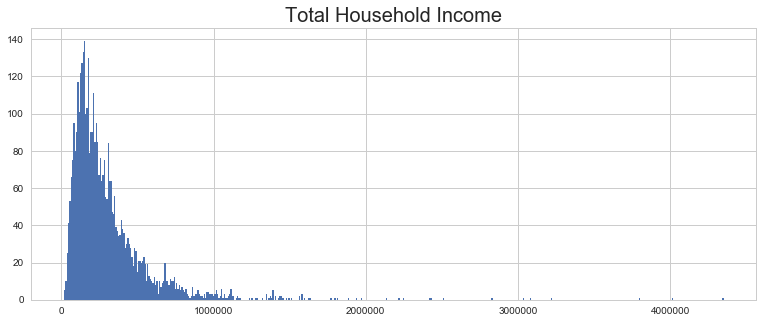

In [7]:
df[['Total Household Income']][df['Region'] == 'IVA - CALABARZON'].hist(bins=500, figsize=(13,5))
plt.title("Total Household Income", fontsize=20)

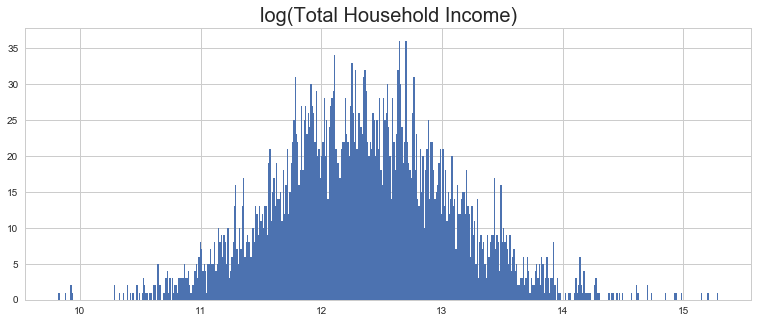

In [8]:
np.log(df[['Total Household Income']][df['Region'] == 'IVA - CALABARZON']).hist(bins=500, figsize=(13,5))
plt.title("log(Total Household Income)", fontsize=20)

## Further Data Munging

After getting a feel for the data, I decided to disaggregate sources of said income and see their totals per region. Preparing how to visualize this data will solve the question asked above.

As we have seen from above, there are three types of income being generated that was reported. Below let us see what the they look like by first looking at the aggregate income per region, then the disaggregated look by exploring these three.

In [9]:
df['Main Source of Income'].value_counts()

Wage/Salaries                 20388
Other sources of Income       10836
Enterpreneurial Activities    10320
Name: Main Source of Income, dtype: int64

In [10]:
df[["Main Source of Income", "Total Household Income", "Region"]].head()

,Main Source of Income,Total Household Income,Region
0,Wage/Salaries,480332,CAR
1,Wage/Salaries,198235,CAR
2,Wage/Salaries,82785,CAR
3,Wage/Salaries,107589,CAR
4,Wage/Salaries,189322,CAR


Just to be safe, there might be some regions that were badly formatted. This removes unnecessary spaces.

In [11]:
df['Region'] = df['Region'].str.strip()

Here is where the disaggregation further happens by splitting the data into other dataframes.

In [12]:
source_income_region_breakdown = df.groupby(['Region', 'Main Source of Income'])['Total Household Income'].sum().reset_index()

source_income_region_total  = df.groupby(['Region'])['Total Household Income'].sum().reset_index()

In [13]:
source_income_region_total = source_income_region_total.sort_values('Total Household Income', ascending=True)

In [14]:
source_income_region_wage = source_income_region_breakdown[['Region', 'Total Household Income']][source_income_region_breakdown['Main Source of Income'] == 'Wage/Salaries'].sort_values('Total Household Income', ascending=True)

source_income_region_source = source_income_region_breakdown[['Region', 'Total Household Income']][source_income_region_breakdown['Main Source of Income'] == 'Other sources of Income'].sort_values('Total Household Income', ascending=True)

source_income_region_entrep = source_income_region_breakdown[['Region', 'Total Household Income']][source_income_region_breakdown['Main Source of Income'] == 'Enterpreneurial Activities'].sort_values('Total Household Income', ascending=True)

## Answering the Question through Visualization

### Total Income per Philippine Region

TOP 5<br/>
<ol>
<li>NCR</li>
<li>IVA - Calabarzon</li>
<li>III - Central Luzon</li>
<li>VI - Western Visayas</li>
<li>VII - Central Visayas</li>
</ol>

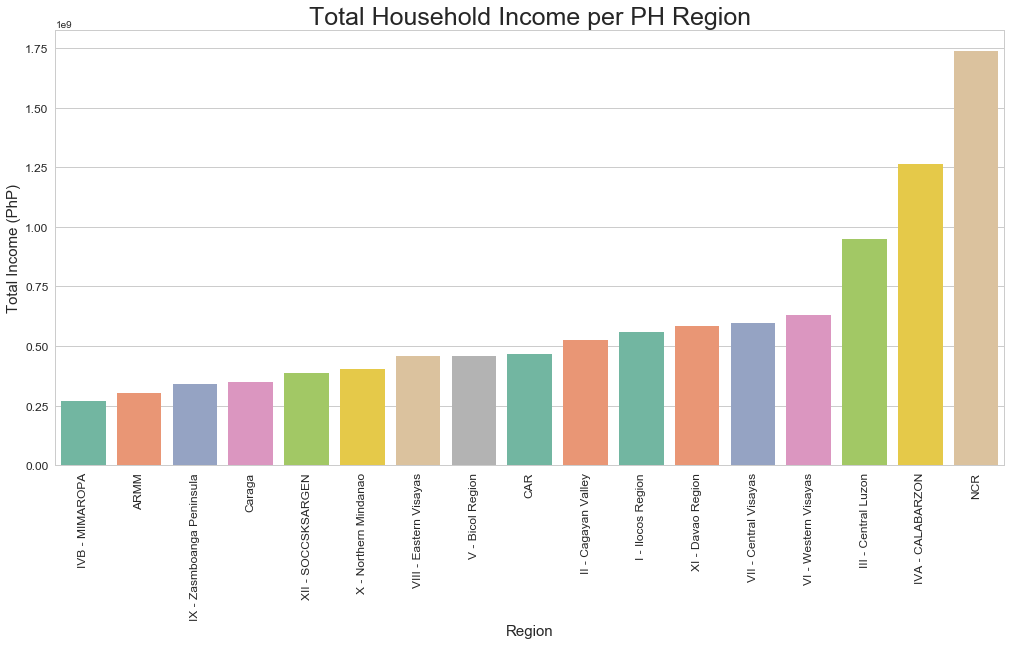

In [15]:
plt.figure(figsize=(17,8))

sns.barplot(x='Region', y='Total Household Income', data=source_income_region_total, palette=color_palette)

plt.title('Total Household Income per PH Region', fontsize=25)

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('Region', fontsize=15)
plt.ylabel('Total Income (PhP)', fontsize=15)

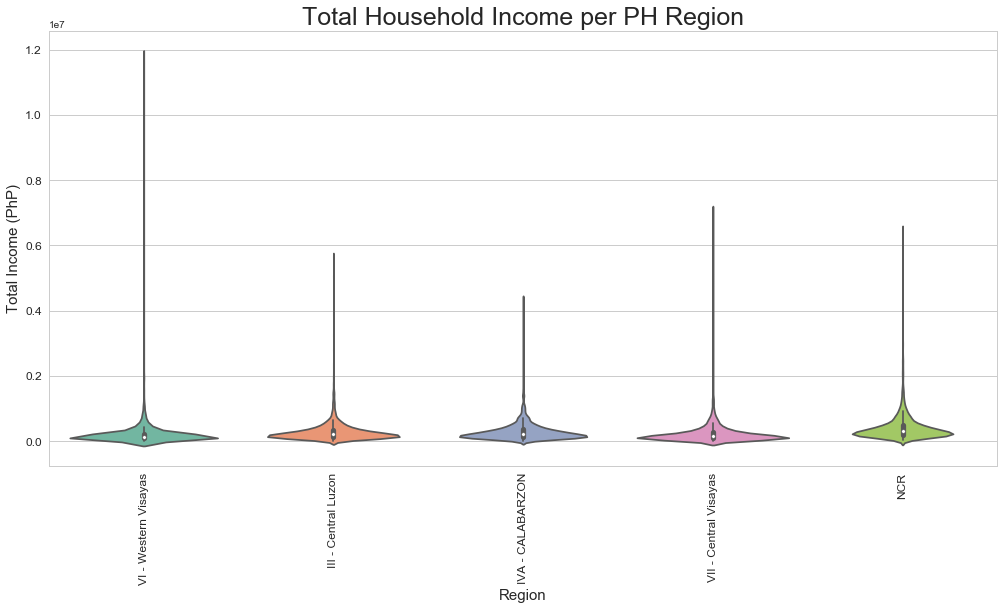

In [16]:
plt.figure(figsize=(17,8))

provinces = ['NCR', 'IVA - CALABARZON', 'III - Central Luzon', 'VI - Western Visayas', 'VII - Central Visayas']
data = df[df['Region'].isin(provinces)]

sns.violinplot(x='Region', y='Total Household Income', data=data, palette=color_palette)

plt.title('Total Household Income per PH Region', fontsize=25)

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('Region', fontsize=15)
plt.ylabel('Total Income (PhP)', fontsize=15)

### Wage/Salaries per PH Region

TOP 5<br/>
<ol>
<li>NCR</li>
<li>IVA - Calabarzon</li>
<li>III - Central Luzon</li>
<li>XI - Davao Region</li>
<li>VII - Central Visayas</li>
</ol>

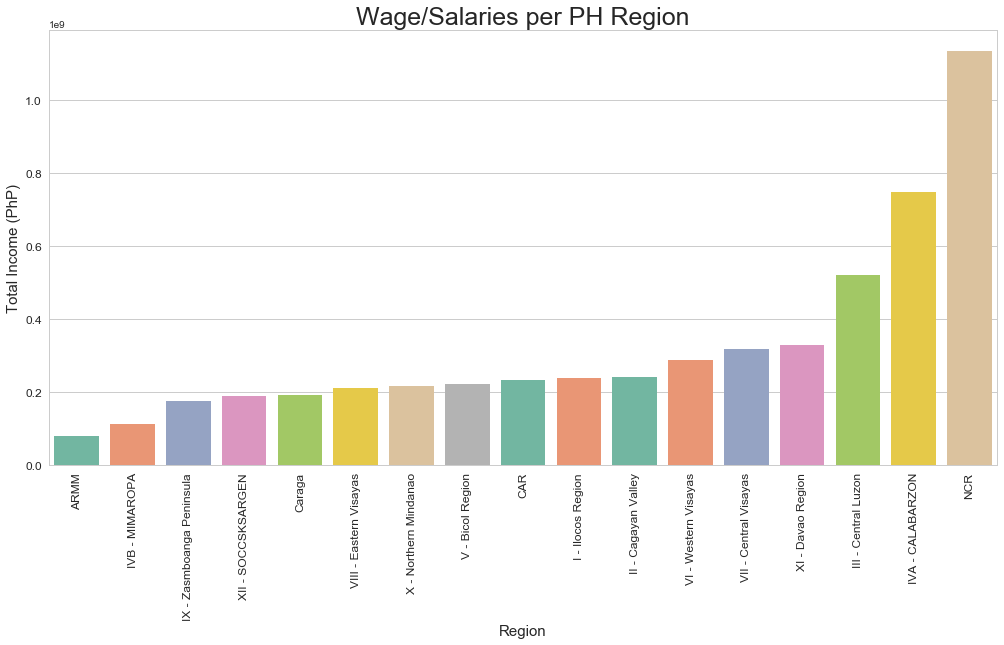

In [17]:
plt.figure(figsize=(17,8))

sns.barplot(x='Region', y='Total Household Income', data=source_income_region_wage, palette=color_palette)

plt.title('Wage/Salaries per PH Region', fontsize=25)

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('Region', fontsize=15)
plt.ylabel('Total Income (PhP)', fontsize=15)

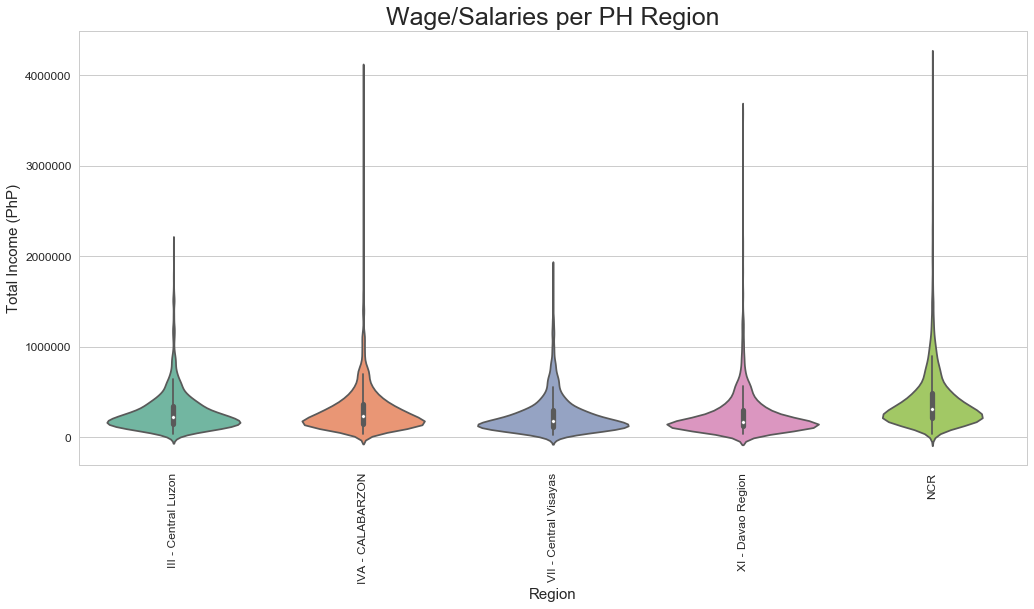

In [18]:
plt.figure(figsize=(17,8))

provinces = ['NCR', 'IVA - CALABARZON', 'III - Central Luzon', 'XI - Davao Region', 'VII - Central Visayas']
data = df[['Region', 'Total Household Income']][df['Main Source of Income'] == 'Wage/Salaries']
data = data[data['Region'].isin(provinces)]

sns.violinplot(x='Region', y='Total Household Income', data=data, palette=color_palette)

plt.title('Wage/Salaries per PH Region', fontsize=25)

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('Region', fontsize=15)
plt.ylabel('Total Income (PhP)', fontsize=15)

### Other Source of Income per Philippine Region

TOP 5<br/>
<ol>
<li>NCR</li>
<li>IVA - Calabarzon</li>
<li>III - Central Luzon</li>
<li>I - Ilocos Region</li>
<li>VI - Western Visayas</li>
</ol>

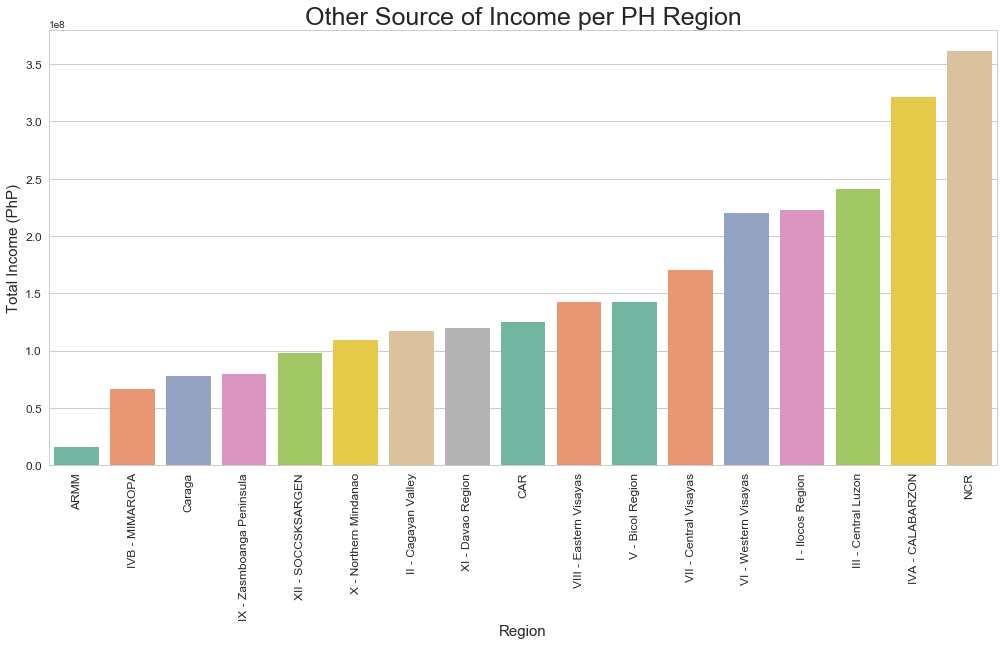

In [19]:
plt.figure(figsize=(17,8))

sns.barplot(x='Region', y='Total Household Income', data=source_income_region_source, palette=color_palette)

plt.title('Other Source of Income per PH Region', fontsize=25)

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('Region', fontsize=15)
plt.ylabel('Total Income (PhP)', fontsize=15)

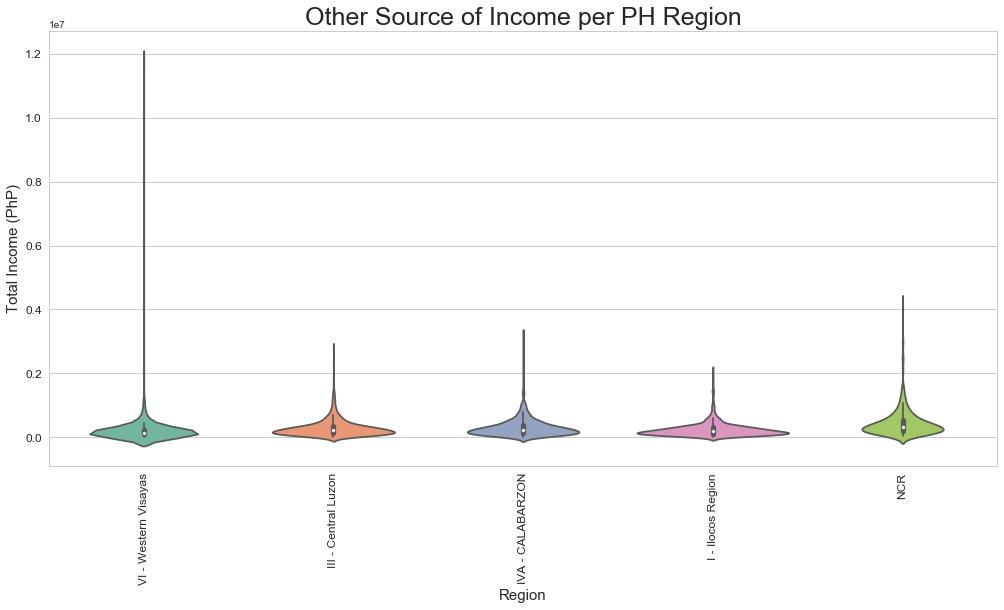

In [20]:
plt.figure(figsize=(17,8))

provinces = ['NCR', 'IVA - CALABARZON', 'III - Central Luzon', 'I - Ilocos Region', 'VI - Western Visayas']
data = df[['Region', 'Total Household Income']][df['Main Source of Income'] == 'Other sources of Income']
data = data[data['Region'].isin(provinces)]

sns.violinplot(x='Region', y='Total Household Income', data=data, palette=color_palette)

plt.title('Other Source of Income per PH Region', fontsize=25)

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('Region', fontsize=15)
plt.ylabel('Total Income (PhP)', fontsize=15)

### Entrepreneurial Income per Philippine Region

TOP 5<br/>
<ol>
<li>NCR</li>
<li>ARMM</li>
<li>IVA - Calabarzon</li>
<li>III - Central Luzon</li>
<li>II - Cagayan Valley</li>
</ol>

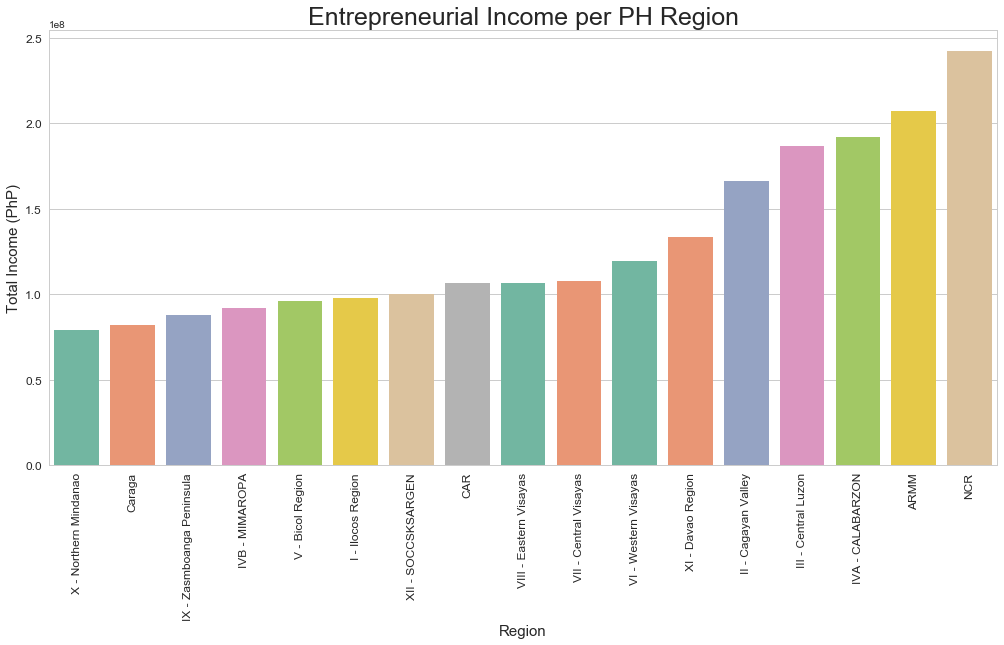

In [21]:
plt.figure(figsize=(17,8))

sns.barplot(x='Region', y='Total Household Income', data=source_income_region_entrep, palette=color_palette)

plt.title('Entrepreneurial Income per PH Region', fontsize=25)

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('Region', fontsize=15)
plt.ylabel('Total Income (PhP)', fontsize=15)

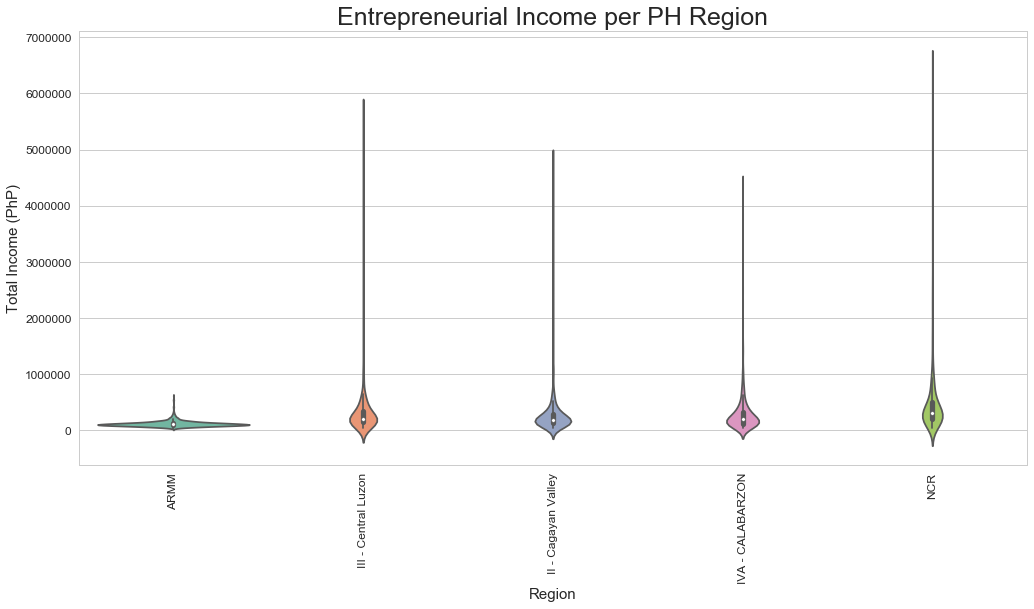

In [22]:
plt.figure(figsize=(17,8))

provinces = ['NCR', 'IVA - CALABARZON', 'ARMM', 'III - Central Luzon', 'II - Cagayan Valley']
data = df[['Region', 'Total Household Income']][df['Main Source of Income'] == 'Enterpreneurial Activities']
data = data[data['Region'].isin(provinces)]

sns.violinplot(x='Region', y='Total Household Income', data=data, palette=color_palette)

plt.title('Entrepreneurial Income per PH Region', fontsize=25)

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('Region', fontsize=15)
plt.ylabel('Total Income (PhP)', fontsize=15)

# Answering the question

The question posed above was "how do the other regions fair with Metro Manila in terms of sources of income?" As expected, Metro Manila tops in terms of generatig income because it is the economic center of the country. However, we see that regions like <b>CALABARZON</b> and <b>Central Luzon</b> also hold promise for economic opportunities.

A good thing to think about is the events that will transpire once the country implements federalism. Will Metro Manila be drained of jobs, or will they stay there? Will <b>CALABARZON</b> and/or <b>Central Luzon</b> take over as the new economic center, assuming the provinces that comprise it remains like that under federalism?